In [1]:
from scipy.io import loadmat
import numpy as np
import scipy

In [2]:
mnist = loadmat('mnist_train.mat')

In [3]:
X = mnist['train_X']
Y = mnist['train_labels']

In [4]:
X.shape

(60000, 784)

In [5]:
idx = np.random.randint(X.shape[0], size=6000)

In [6]:
X_train=X[idx,:]
Y_train=Y[idx,:]

In [7]:
from sklearn.manifold import TSNE

In [8]:
X_reduced = TSNE().fit_transform(X_train)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
cY = Y_train-1

In [11]:
def PCA(X, n_components=2):
    cov_X = np.cov(X, rowvar=False)
    eig_val, eig_vect = scipy.linalg.eigh(cov_X)
    eig_inds = np.flip(np.argsort(eig_val))
    return np.matmul(X, eig_vect[:,eig_inds[:n_components]]), np.take_along_axis(eig_val,eig_inds,axis=0)

In [12]:
reduced_X, eig_vals = PCA(X_train, n_components=3)

In [13]:
reduced_X[:,0]

array([-5.56425556, -1.71565792, -8.07853969, ..., -1.61903716,
       -5.81287886,  0.75288423])

In [14]:
reduced_X[:,1]

array([ 3.93719303, -1.55143532,  0.64743363, ...,  1.74812705,
       -0.9955192 , -2.64171503])

In [15]:
reduced_X[:,1]

array([ 3.93719303, -1.55143532,  0.64743363, ...,  1.74812705,
       -0.9955192 , -2.64171503])

In [18]:
%matplotlib qt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 90)
ax.scatter(reduced_X[:,0],reduced_X[:,1], reduced_X[:,1], c=cY, cmap='tab10', alpha=0.5)


In [20]:
X_reduced = TSNE(n_components=3).fit_transform(X_train)

In [ ]:
!pip install pyqt5

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 90)
ax.scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2], c=cY, cmap='tab10', alpha=0.5)

In [145]:
X_reduced[:,0]

array([14.352944 , 13.2107315, 16.522585 , ..., 21.338882 , 19.392155 ,
       14.1397085], dtype=float32)

In [146]:
X_reduced[:,1]

array([-16.634523 ,  -6.0240517,   2.6022828, ...,  -7.9363003,
        -2.056633 , -17.286352 ], dtype=float32)

In [143]:
X_reduced[:,2]

array([ -1.6746944,   1.6678419,   6.2064047, ...,  -9.364323 ,
       -15.570028 ,   1.345488 ], dtype=float32)

In [43]:
swiss = loadmat('mnist_train.mat')

In [75]:
swiss['Y_data']

array([[39.40748137, 63.46282985,  4.29079433, ..., 19.01280751,
        94.79912446, 76.50555546],
       [15.51749805, 12.96227365, 27.81921752, ..., 18.35944185,
        32.82565478,  1.06143158]])

In [144]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(70, 90)
ax.scatter(swiss['X_data'][0,:],swiss['X_data'][1,:],swiss['X_data'][2,:], c=swiss['Y_data'][0,:], cmap=plt.cm.Spectral)

In [95]:
swiss_flipped = np.transpose(swiss['X_data'])

In [148]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(80, 90)
ax.scatter(swiss_flipped[:,0],swiss_flipped[:,1],swiss_flipped[:,2], c=swiss['Y_data'][0,:], cmap=plt.cm.Spectral)

In [97]:
swiss_reduced = TSNE().fit_transform(swiss_flipped)

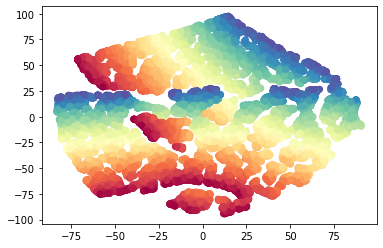

In [123]:
plt.scatter(swiss_reduced[:,0],swiss_reduced[:,1], c=swiss['Y_data'][0,:], cmap=plt.cm.Spectral)

In [100]:
reduced_swiss, eig_vals = PCA(swiss_flipped, n_components=2)

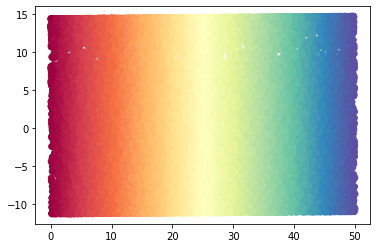

In [121]:
plt.scatter(reduced_swiss[:,0],reduced_swiss[:,1], c=swiss['Y_data'][1,:], cmap=plt.cm.Spectral)

In [113]:
import numpy as np
import pylab


def Hbeta(D=np.array([]), beta=1.0):
    """
        Compute the perplexity and the P-row for a specific value of the
        precision of a Gaussian distribution.
    """

    # Compute P-row and corresponding perplexity
    P = np.exp(-D.copy() * beta)
    sumP = sum(P)
    H = np.log(sumP) + beta * np.sum(D * P) / sumP
    P = P / sumP
    return H, P


def x2p(X=np.array([]), tol=1e-5, perplexity=30.0):
    """
        Performs a binary search to get P-values in such a way that each
        conditional Gaussian has the same perplexity.
    """

    # Initialize some variables
    print("Computing pairwise distances...")
    (n, d) = X.shape
    sum_X = np.sum(np.square(X), 1)
    D = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
    P = np.zeros((n, n))
    beta = np.ones((n, 1))
    logU = np.log(perplexity)

    # Loop over all datapoints
    for i in range(n):

        # Print progress
        if i % 500 == 0:
            print("Computing P-values for point %d of %d..." % (i, n))

        # Compute the Gaussian kernel and entropy for the current precision
        betamin = -np.inf
        betamax = np.inf
        Di = D[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))]
        (H, thisP) = Hbeta(Di, beta[i])

        # Evaluate whether the perplexity is within tolerance
        Hdiff = H - logU
        tries = 0
        while np.abs(Hdiff) > tol and tries < 50:

            # If not, increase or decrease precision
            if Hdiff > 0:
                betamin = beta[i].copy()
                if betamax == np.inf or betamax == -np.inf:
                    beta[i] = beta[i] * 2.
                else:
                    beta[i] = (beta[i] + betamax) / 2.
            else:
                betamax = beta[i].copy()
                if betamin == np.inf or betamin == -np.inf:
                    beta[i] = beta[i] / 2.
                else:
                    beta[i] = (beta[i] + betamin) / 2.

            # Recompute the values
            (H, thisP) = Hbeta(Di, beta[i])
            Hdiff = H - logU
            tries += 1

        # Set the final row of P
        P[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))] = thisP

    # Return final P-matrix
    print("Mean value of sigma: %f" % np.mean(np.sqrt(1 / beta)))
    return P


def pca(X=np.array([]), no_dims=50):
    """
        Runs PCA on the NxD array X in order to reduce its dimensionality to
        no_dims dimensions.
    """

    print("Preprocessing the data using PCA...")
    (n, d) = X.shape
    X = X - np.tile(np.mean(X, 0), (n, 1))
    (l, M) = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, M[:, 0:no_dims])
    return Y


def tsne(X=np.array([]), no_dims=2, initial_dims=50, perplexity=30.0):
    """
        Runs t-SNE on the dataset in the NxD array X to reduce its
        dimensionality to no_dims dimensions. The syntaxis of the function is
        `Y = tsne.tsne(X, no_dims, perplexity), where X is an NxD NumPy array.
    """

    # Check inputs
    if isinstance(no_dims, float):
        print("Error: array X should have type float.")
        return -1
    if round(no_dims) != no_dims:
        print("Error: number of dimensions should be an integer.")
        return -1

    # Initialize variables
    X = pca(X, initial_dims).real
    (n, d) = X.shape
    max_iter = 500
    initial_momentum = 0.5
    final_momentum = 0.8
    eta = 500
    min_gain = 0.01
    Y = np.random.randn(n, no_dims)
    dY = np.zeros((n, no_dims))
    iY = np.zeros((n, no_dims))
    gains = np.ones((n, no_dims))

    # Compute P-values
    P = x2p(X, 1e-5, perplexity)
    P = P + np.transpose(P)
    P = P / np.sum(P)
    P = P * 4.									# early exaggeration
    P = np.maximum(P, 1e-12)

    # Run iterations
    for iter in range(max_iter):

        # Compute pairwise affinities
        sum_Y = np.sum(np.square(Y), 1)
        num = -2. * np.dot(Y, Y.T)
        num = 1. / (1. + np.add(np.add(num, sum_Y).T, sum_Y))
        num[range(n), range(n)] = 0.
        Q = num / np.sum(num)
        Q = np.maximum(Q, 1e-12)

        # Compute gradient
        PQ = P - Q
        for i in range(n):
            dY[i, :] = np.sum(np.tile(PQ[:, i] * num[:, i], (no_dims, 1)).T * (Y[i, :] - Y), 0)

        # Perform the update
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum
        gains = (gains + 0.2) * ((dY > 0.) != (iY > 0.)) + \
                (gains * 0.8) * ((dY > 0.) == (iY > 0.))
        gains[gains < min_gain] = min_gain
        iY = momentum * iY - eta * (gains * dY)
        Y = Y + iY
        Y = Y - np.tile(np.mean(Y, 0), (n, 1))

        # Compute current value of cost function
        if (iter + 1) % 10 == 0:
            C = np.sum(P * np.log(P / Q))
            print("Iteration %d: error is %f" % (iter + 1, C))

        # Stop lying about P-values
        if iter == 100:
            P = P / 4.

    # Return solution
    return Y


In [109]:
idx = np.random.randint(swiss_flipped.shape[0], size=2000)
swiss_flipped_subsample = swiss_flipped[idx,:]
cY = swiss['Y_data'][0,idx]
swiss_reduced_LVM = tsne(swiss_flipped_subsample, initial_dims=30, perplexity=40)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 2000...
Computing P-values for point 500 of 2000...
Computing P-values for point 1000 of 2000...
Computing P-values for point 1500 of 2000...
Mean value of sigma: 3.386415
Iteration 10: error is 20.143499
Iteration 20: error is 17.484435
Iteration 30: error is 14.660423
Iteration 40: error is 13.511400
Iteration 50: error is 13.257130
Iteration 60: error is 13.180456
Iteration 70: error is 13.150786
Iteration 80: error is 13.093941
Iteration 90: error is 12.958991
Iteration 100: error is 12.866358
Iteration 110: error is 1.579193
Iteration 120: error is 1.271410
Iteration 130: error is 1.077608
Iteration 140: error is 0.960507
Iteration 150: error is 0.884811
Iteration 160: error is 0.832267
Iteration 170: error is 0.794126
Iteration 180: error is 0.765423
Iteration 190: error is 0.743211
Iteration 200: error is 0.725648
Iteration 210: error is 0.711522
Iteration 220: error is 0.699999

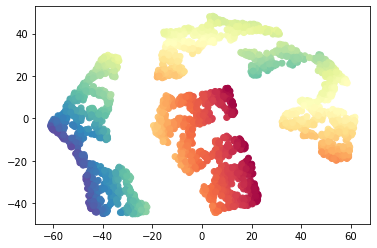

In [111]:
plt.scatter(swiss_reduced_LVM[:,0],swiss_reduced_LVM[:,1], c=cY, cmap=plt.cm.Spectral)

In [112]:
X, color = datasets.make_swiss_roll(n_samples=1000)

In [114]:
swiss_LVM = tsne(X, initial_dims=30, perplexity=40)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1000...
Computing P-values for point 500 of 1000...
Mean value of sigma: 3.032908
Iteration 10: error is 16.077103
Iteration 20: error is 13.360506
Iteration 30: error is 11.618983
Iteration 40: error is 11.216167
Iteration 50: error is 11.169446
Iteration 60: error is 11.265772
Iteration 70: error is 11.292567
Iteration 80: error is 11.304822
Iteration 90: error is 11.303306
Iteration 100: error is 11.296877
Iteration 110: error is 1.076619
Iteration 120: error is 0.763334
Iteration 130: error is 0.625944
Iteration 140: error is 0.560986
Iteration 150: error is 0.525038
Iteration 160: error is 0.502940
Iteration 170: error is 0.488387
Iteration 180: error is 0.478326
Iteration 190: error is 0.471108
Iteration 200: error is 0.465776
Iteration 210: error is 0.461739
Iteration 220: error is 0.458620
Iteration 230: error is 0.456166
Iteration 240: error is 0.454203
Iteration 250: error is

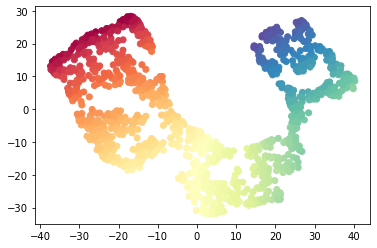

In [118]:
plt.scatter(swiss_LVM[:,0],swiss_LVM[:,1], c=color, cmap=plt.cm.Spectral)